#Analysis

*We confirm, based on a single date sample, that max temp was higher for cities near the equator (0°)

*We can see the impact of winter in the Northern Hemisphere, as temperatures are signficantly lower traveling North

*From a visual inspection, cloudiness and humidity did not appear to vary significantly based on proximity to equator

*Windspeed did appear to be more extreme (higher) near the poles and more moderate (lower) near the equator

#Setup

In [14]:
import json
import requests
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
from time import sleep
import datetime


#Retreive API Key

In [2]:
file_name = "../../ClassExamples/api_keys.json"
data = json.load(open(file_name))

owkey = data['open_weather_map_api_key']


#Develop City List

In [5]:
city_list = []
lat_list = []

#cycle through in ranges of 10 degrees wide to ensure a good distribution across the latitudes
#since longitude isn't a dependent variable, I just let that be random across all 360 degrees
#from trial and error I decided to select 8 in each 10 degree band (it slides by 1 degree each time)
#this seems to ensure at least 500 cities (and I can confirm when I run that I get 500)
#probably could have looped until I had 500 unique, but this seemed to do the trick

for x in range (-90,81):
    for y in range (8):
        lat = np.random.uniform(x, x+10)
        lng = np.random.uniform(-180,180)
        city = citipy.nearest_city(lat, lng)
        city.city_name=city.city_name.replace(" ","+")
        city_list.append(city.city_name)
        lat_list.append(lat)

city_list_df=pd.DataFrame(city_list)
lat_list_df=pd.DataFrame(lat_list)

city_list_df.columns=["City"]
lat_list_df.columns=["Lat"]

city_list_df.drop_duplicates(inplace = True)
city_list_df["Lat"]=lat_list_df["Lat"]

city_list_df.shape

(598, 2)

In [6]:
city_list_df.head()

,City,Lat
0,hermanus,-83.703435
1,mataura,-84.057807
2,albany,-87.210521
4,ushuaia,-84.844373
5,punta+arenas,-82.690313


#Cycle through API calls to acquire weather data

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [8]:
weather_data = []
city_count = 1

for city in city_list_df["City"]:
    query_url = url + "appid=" + owkey + "&units=" + units + "&q=" + city
    print ("Processing City #"+str(city_count)+ ": "+city)
    print (query_url)
    city_count += 1
    response = requests.get(query_url).json()
    sleep(1)
    weather_data.append(response)
    try:
        maxtemp = weather_data[0]["main"]["temp_max"]
        humidity = weather_data[0]["main"]["humidity"]
        cloud = weather_data[0]["clouds"]["all"]
        windspeed = weather_data[0]["wind"]["speed"]
        date = weather_data[0]["dt"]
        city_list_df.loc[city_list_df["City"]==city,"Max Temp"]=maxtemp
        city_list_df.loc[city_list_df["City"]==city,"Cloudiness"]=cloud
        city_list_df.loc[city_list_df["City"]==city,"Humidity"]=humidity
        city_list_df.loc[city_list_df["City"]==city,"Wind Speed"]=windspeed
        city_list_df.loc[city_list_df["City"]==city,"Date"]=date
    except:
        print("error in retrieving data")
        weather_data=[]
        continue
        
    weather_data=[]
    

Processing City #1: hermanus
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=hermanus
Processing City #2: mataura
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=mataura
Processing City #3: albany
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=albany
Processing City #4: ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=ushuaia
Processing City #5: punta+arenas
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=punta+arenas
Processing City #6: bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=bredasdorp
Processing City #7: port+alfred
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=port+alfred
Pro

Processing City #58: necochea
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=necochea
Processing City #59: griffith
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=griffith
Processing City #60: luderitz
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=luderitz
Processing City #61: dargaville
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=dargaville
Processing City #62: port+augusta
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=port+augusta
Processing City #63: julio+de+castilhos
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=julio+de+castilhos
Processing City #64: moree
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&uni

error in retrieving data
Processing City #115: georgetown
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=georgetown
Processing City #116: bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=bengkulu
error in retrieving data
Processing City #117: belmonte
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=belmonte
Processing City #118: san+ramon
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=san+ramon
Processing City #119: bambanglipuro
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=bambanglipuro
Processing City #120: fare
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=fare
Processing City #121: grand+river+south+east
http://api.openweathermap.org/data/2.5/

Processing City #171: sola
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=sola
Processing City #172: paita
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=paita
Processing City #173: sikonge
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=sikonge
Processing City #174: pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=pitimbu
Processing City #175: takoradi
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=takoradi
Processing City #176: karema
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=karema
Processing City #177: popondetta
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=popondetta
Processing City #

Processing City #227: butaritari
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=butaritari
Processing City #228: sao+gabriel+da+cachoeira
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=sao+gabriel+da+cachoeira
Processing City #229: pochutla
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=pochutla
Processing City #230: burica
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=burica
error in retrieving data
Processing City #231: kieta
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=kieta
Processing City #232: jalingo
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=jalingo
Processing City #233: seremban
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c36

Processing City #283: faya
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=faya
Processing City #284: sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=sinnamary
Processing City #285: borama
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=borama
error in retrieving data
Processing City #286: airai
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=airai
Processing City #287: rabak
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=rabak
Processing City #288: bocana+de+paiwas
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=bocana+de+paiwas
Processing City #289: bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units

Processing City #340: rock+sound
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=rock+sound
Processing City #341: shingu
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=shingu
Processing City #342: tecolutla
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=tecolutla
Processing City #343: saint+george
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=saint+george
Processing City #344: cockburn+town
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=cockburn+town
Processing City #345: ratangarh
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=ratangarh
Processing City #346: bhadasar
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&uni

Processing City #397: linqing
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=linqing
Processing City #398: amherstburg
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=amherstburg
Processing City #399: tucumcari
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=tucumcari
Processing City #400: safranbolu
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=safranbolu
Processing City #401: pahrump
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=pahrump
Processing City #402: bethel
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=bethel
Processing City #403: calvia
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=calvia

Processing City #454: alekseyevka
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=alekseyevka
Processing City #455: spearfish
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=spearfish
Processing City #456: kenmare
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=kenmare
Processing City #457: kachiry
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=kachiry
Processing City #458: chapais
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=chapais
Processing City #459: turochak
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=turochak
Processing City #460: hampton
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=hampton

Processing City #511: emmauss
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=emmauss
error in retrieving data
Processing City #512: ayan
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=ayan
Processing City #513: siva
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=siva
Processing City #514: bagdarin
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=bagdarin
Processing City #515: attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=attawapiskat
error in retrieving data
Processing City #516: shchelkun
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=shchelkun
Processing City #517: krasnovishersk
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368

Processing City #567: bolungarvik
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=bolungarvik
error in retrieving data
Processing City #568: almaznyy
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=almaznyy
Processing City #569: svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=svetlogorsk
Processing City #570: lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=lavrentiya
Processing City #571: clyde+river
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=clyde+river
Processing City #572: skjervoy
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a739ff5bb7a4d3fa0d2&units=imperial&q=skjervoy
Processing City #573: tura
http://api.openweathermap.org/data/2.5/weather?appid=2cee94c368d90a7

#Check data and make sure more than 500 cities

In [9]:
city_list_df

,City,Lat,Max Temp,Cloudiness,Humidity,Wind Speed,Date
0,hermanus,-83.703435,79.31,8.0,53.0,9.22,1.516982e+09
1,mataura,-84.057807,58.12,8.0,84.0,4.97,1.516982e+09
2,albany,-87.210521,21.20,20.0,48.0,3.36,1.516978e+09
4,ushuaia,-84.844373,57.20,40.0,62.0,20.80,1.516979e+09
5,punta+arenas,-82.690313,62.60,40.0,55.0,28.86,1.516979e+09
9,bredasdorp,-81.056436,73.40,100.0,73.0,16.11,1.516979e+09
10,port+alfred,-85.367207,76.34,56.0,79.0,16.82,1.516982e+09
13,hobart,-81.404092,59.00,20.0,87.0,2.24,1.516979e+09
17,vaini,-82.942271,68.74,0.0,58.0,2.51,1.516982e+09
19,new+norfolk,-82.536843,59.00,20.0,87.0,2.24,1.516979e+09


#Clean out any cities that didn't return data and confirm still have greater than 500 cities

In [10]:
city_list_df=city_list_df.dropna()
city_list_df

,City,Lat,Max Temp,Cloudiness,Humidity,Wind Speed,Date
0,hermanus,-83.703435,79.31,8.0,53.0,9.22,1.516982e+09
1,mataura,-84.057807,58.12,8.0,84.0,4.97,1.516982e+09
2,albany,-87.210521,21.20,20.0,48.0,3.36,1.516978e+09
4,ushuaia,-84.844373,57.20,40.0,62.0,20.80,1.516979e+09
5,punta+arenas,-82.690313,62.60,40.0,55.0,28.86,1.516979e+09
9,bredasdorp,-81.056436,73.40,100.0,73.0,16.11,1.516979e+09
10,port+alfred,-85.367207,76.34,56.0,79.0,16.82,1.516982e+09
13,hobart,-81.404092,59.00,20.0,87.0,2.24,1.516979e+09
17,vaini,-82.942271,68.74,0.0,58.0,2.51,1.516982e+09
19,new+norfolk,-82.536843,59.00,20.0,87.0,2.24,1.516979e+09


#Export City Data with Weather Info to .csv file

In [24]:
city_list_df.to_csv("City_Weather_Data.csv")

In [18]:
Date = city_list_df["Date"][0]
Date_new = datetime.datetime.fromtimestamp(int(Date)).strftime('%m/%d/%Y')
print (Date_new)

01/26/2018


#Develop Plots, save to file, and show

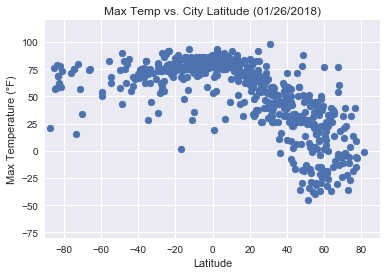

In [28]:
sns.set()
sns.axes_style()

plt.xlim(-90, 90)
plt.ylim(-80, 120)

plt.title("Max Temp vs. City Latitude ("+Date_new+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

plt.scatter(city_list_df["Lat"], city_list_df["Max Temp"], marker="o")
plt.savefig ("Temp_v_Lat.png")
plt.show ()

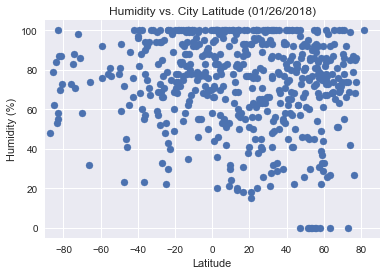

In [27]:
plt.xlim(-90, 90)
plt.ylim(-5, 105)

plt.title("Humidity vs. City Latitude ("+Date_new+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(city_list_df["Lat"], city_list_df["Humidity"], marker="o")
plt.savefig ("Humidity_v_Lat.png")
plt.show ()
    

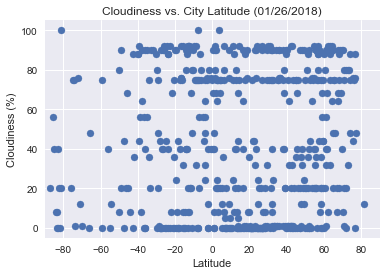

In [29]:
plt.xlim(-90, 90)
plt.ylim(-5, 105)

plt.title("Cloudiness vs. City Latitude ("+Date_new+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(city_list_df["Lat"], city_list_df["Cloudiness"], marker="o")
plt.savefig ("Cloudiness_v_Lat.png")
plt.show ()

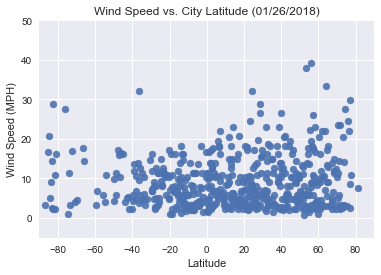

In [30]:
plt.xlim(-90, 90)
plt.ylim(-5, 50)

plt.title("Wind Speed vs. City Latitude ("+Date_new+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.scatter(city_list_df["Lat"], city_list_df["Wind Speed"], marker="o",alpha=.9)
plt.savefig ("WindSpeed_v_Lat.png")
plt.show ()

